In [11]:
import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import sys as sys
import time


In [159]:
def RaymondResponse(kd, eps, order, npass=1):
    return (1.0/(1.0 + eps*(np.tan(kd*np.pi/2)**order))**npass)
def One2OneResponse(kd, eps, npass=1):
    return (1.0 + eps*(np.cos(kd*np.pi)-1.0))**npass
def ShapiroResponse(kd, eps, order):
    num = 0.0
    A = [1.0]
    for n in np.arange(int(2*order) - 1):
        num = num + np.sin(kd*np.pi/2)**(2*n)
    return 1.0 - np.sin(kd*np.pi/2)**(2)
def GaitnondeResponse(kd, eps, order):
    alpha = eps
    a = [(193.+126.*alpha)/256., (105.+302.*alpha)/256., (-15.+30.*alpha)/64., (45.-90.*alpha)/512., (-5.0+10.0*alpha)/512., (1.0-2.0*alpha)/512.]
    return a[0]*np.cos(2*kd*np.pi/2)  \
         + a[1]*np.cos(4*kd*np.pi/2)  \
         + a[2]*np.cos(kd*np.pi/2)**6  \
         + a[3]*np.cos(kd*np.pi/2)**8  \
         + a[4]*np.cos(kd*np.pi/2)**10
        

In [160]:
kd = np.arange(0,100) / 100

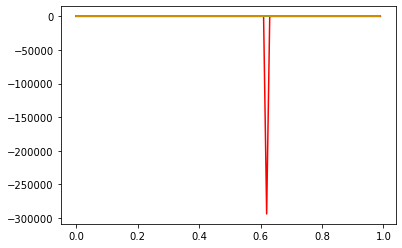

In [164]:
plt.plot(kd,RaymondResponse(kd, 1., 6, npass=1), color='k', label='NPASS=1')
plt.plot(kd,RaymondResponse(kd, -0.1, 6, npass=3), color='r', label='NPASS=3')
plt.plot(kd,One2OneResponse(kd, 1.0, npass=1), color='y', label='121')


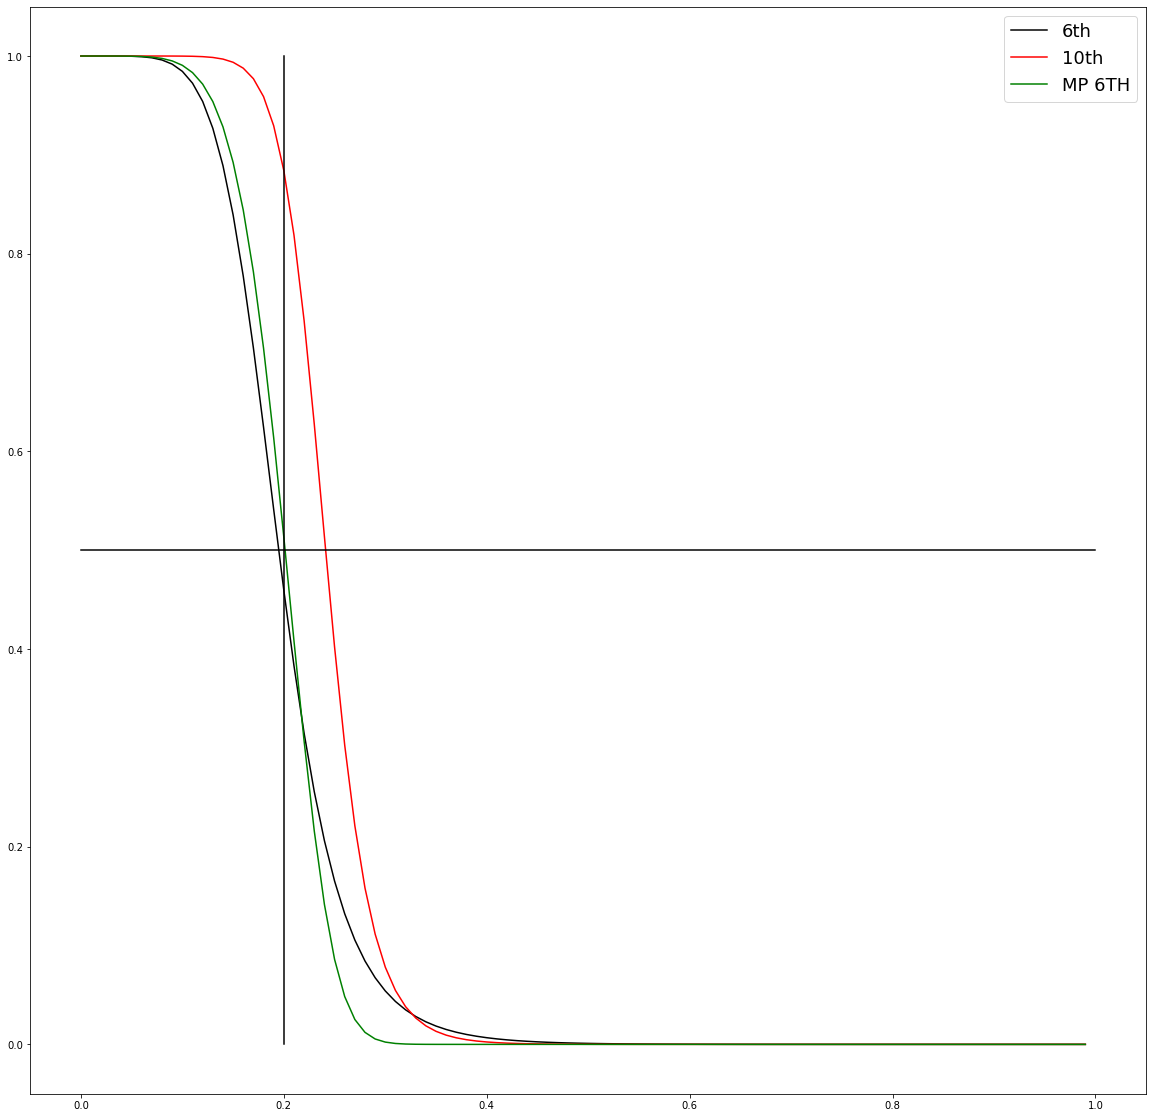

In [199]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

r1 = RaymondResponse(kd, 1000.0, 6, npass=1)
r2 = RaymondResponse(kd, 10000.0, 10, npass=1)
r3 = RaymondResponse(kd, 100.0, 6, npass=6)
#r3 = GaitnondeResponse(kd, -0.49, 1)
plt.plot(kd,r1, color='k', label='6th')
plt.plot(kd,r2, color='r', label='10th')
plt.plot(kd,r3, color='g', label='MP 6TH')
plt.plot([0.2,0.2],[0.0,1.0], color='k')
plt.plot([0.0,1.0],[0.5,0.50], color='k')
plt.legend(fontsize=18)

In [111]:
import numpy
import scipy
import math
order = 5 # Accuracy order = 2*n
xi = numpy.array([0.80451754409821,1.30782744521022,1.61740840780374])
print('=============================================')
print('C^'+str(xi.size)+'S^'+str(order)+' filter')
print('=============================================')
print('Root-frequencies')
print('---------------------------------------------')
p = scipy.poly1d([1])
for i in range(xi.size):
    print('xi'+str(i+1)+' =',xi[i])
    c0 = math.tan(0.5*xi[i])**2
    p=p*(scipy.poly1d([1+c0,0,c0]))**2
print('=============================================')
print('Generalized Shapiro filter A2k coefficients')
print('---------------------------------------------')
A2k = []
for n in range(int(order/2-1)):
    A2k.append(0)
for k in range(2*xi.size+1):
    ind = 2*(2*xi.size-k)
    A2k.append((-1)**k*p.c[ind])
for n in range(int(order/2)+2*xi.size):
    print('A'+str(2*(n+1))+' =',A2k[n])
print('=============================================')
print('Expanded filter classical ak coefficients')
print('---------------------------------------------')
ak = []
ncoef = int(order/2) + 2*xi.size
p = scipy.poly1d([1,0])**ncoef
for i in range(ncoef):
    p=p\
    + (scipy.poly1d(A2k[i])*(-1)**i) \
    * (scipy.poly1d([1,-1])/2)**(2*(i+1)) \
    * (scipy.poly1d([1,0])**(ncoef-i-1))
ak = p.c[ncoef:]
for i in range(ncoef+1):
    print('a'+str(i)+' =',ak[i])
print('=============================================')

C^3S^5 filter
Root-frequencies
---------------------------------------------
xi1 = 0.80451754409821
xi2 = 1.30782744521022
xi3 = 1.61740840780374
Generalized Shapiro filter A2k coefficients
---------------------------------------------
A2 = 0
A4 = 0.013622258437807696
A6 = -0.3034462755490904
A8 = 2.6506414335002972
A10 = -11.618901936148717
A12 = 27.165029662617826
A14 = -32.3726735657934
A16 = 15.465728422935278
Expanded filter classical ak coefficients
---------------------------------------------
a0 = 0.8402449709114346
a1 = 0.14810852095634308
a2 = -0.11771044926789864
a3 = 0.07950391082606978
a4 = -0.04488756270618188
a5 = 0.020587626803650866
a6 = -0.007288485193934453
a7 = 0.0017999414139372384
a8 = -0.0002359882877034802


In [125]:
print(np.cos(4*kd) - np.cos(kd)**4)

[ 0.00000000e+00 -5.99910005e-04 -2.39856032e-03 -5.39271360e-03
 -9.57698020e-03 -1.49438270e-02 -2.14835899e-02 -2.91844896e-02
 -3.80326509e-02 -4.80121257e-02 -5.91049192e-02 -7.12910193e-02
 -8.45484300e-02 -9.88532068e-02 -1.14179497e-01 -1.30499582e-01
 -1.47783921e-01 -1.66001204e-01 -1.85118399e-01 -2.05100808e-01
 -2.25912126e-01 -2.47514498e-01 -2.69868580e-01 -2.92933612e-01
 -3.16667474e-01 -3.41026763e-01 -3.65966865e-01 -3.91442022e-01
 -4.17405415e-01 -4.43809237e-01 -4.70604772e-01 -4.97742479e-01
 -5.25172071e-01 -5.52842596e-01 -5.80702527e-01 -6.08699844e-01
 -6.36782119e-01 -6.64896608e-01 -6.92990331e-01 -7.21010167e-01
 -7.48902937e-01 -7.76615496e-01 -8.04094821e-01 -8.31288097e-01
 -8.58142806e-01 -8.84606817e-01 -9.10628469e-01 -9.36156662e-01
 -9.61140938e-01 -9.85531568e-01 -1.00927963e+00 -1.03233712e+00
 -1.05465697e+00 -1.07619319e+00 -1.09690094e+00 -1.11673654e+00
 -1.13565763e+00 -1.15362320e+00 -1.17059366e+00 -1.18653090e+00
 -1.20139838e+00 -1.21516